<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span></li><li><span><a href="#Сверка-эффективности-обогащения" data-toc-modified-id="Сверка-эффективности-обогащения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Сверка эффективности обогащения</a></span></li><li><span><a href="#Анализ-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Анализ-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Анализ-распределения-размеров-гранул-сырья" data-toc-modified-id="Анализ-распределения-размеров-гранул-сырья-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ распределения размеров гранул сырья</a></span></li><li><span><a href="#Анализ-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Анализ-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Оценка-разных-моделей" data-toc-modified-id="Оценка-разных-моделей-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Оценка разных моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Изучение и подготовка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [8]:
# Код для считывания данных
df_train = pd.read_csv('df_train_new.csv')
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
# Код для считывания данных
df_test = pd.read_csv('df_test_new.csv')
df_test['date'] = pd.to_datetime(df_test['date'])
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [10]:
# Код для считывания данных
df_full = pd.read_csv('df_full_new.csv')
df_full['date'] = pd.to_datetime(df_full['date'])
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [11]:
# Отсортируем данные по возрастанию даты
df_train = df_train.sort_values(by = 'date')
df_test = df_test.sort_values(by = 'date')
df_full = df_full.sort_values(by = 'date')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null datetime64[ns]
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant     

Мы ознакомились с данными, заменили тип данных колонки 'date' в каждой таблице и отсортировали все строки по дате.

## Сверка эффективности обогащения

In [13]:
# Выделим столбцы, необходимые для расчета эффективности обогащения
df_train_rougher = df_train[['date',
                             'rougher.output.concentrate_au',
                             'rougher.input.feed_au',
                             'rougher.output.tail_au',
                             'rougher.output.recovery']]

In [14]:
df_train_rougher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 5 columns):
date                             14149 non-null datetime64[ns]
rougher.output.concentrate_au    14149 non-null float64
rougher.input.feed_au            14149 non-null float64
rougher.output.tail_au           14149 non-null float64
rougher.output.recovery          14149 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 663.2 KB


In [15]:
df_train_rougher.head()

,date,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery
0,2016-01-15 00:00:00,19.793808,6.486150,1.170244,87.107763
1,2016-01-15 01:00:00,20.050975,6.478583,1.184827,86.843261
2,2016-01-15 02:00:00,19.737170,6.362222,1.162562,86.842308
3,2016-01-15 03:00:00,19.320810,6.118189,1.079755,87.226430
4,2016-01-15 04:00:00,19.216101,5.663707,1.012642,86.688794


In [16]:
df_train_rougher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 5 columns):
date                             14149 non-null datetime64[ns]
rougher.output.concentrate_au    14149 non-null float64
rougher.input.feed_au            14149 non-null float64
rougher.output.tail_au           14149 non-null float64
rougher.output.recovery          14149 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 663.2 KB


Найдем эффективность обогащения по формуле ниже и запишем ее в колонку 'recovery_calculated'

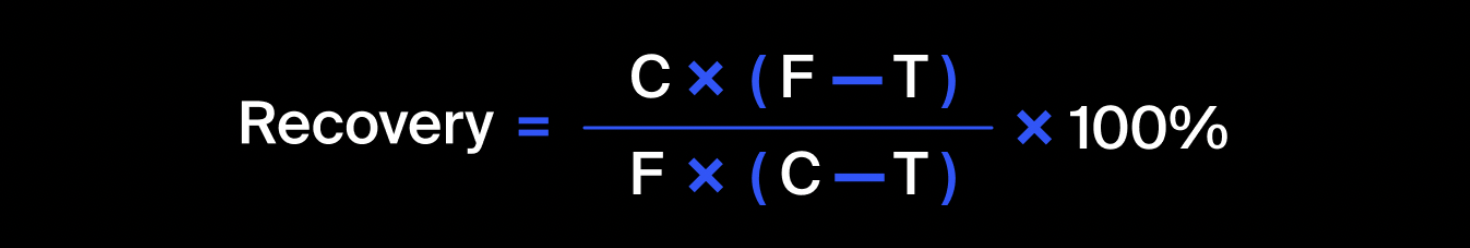

In [17]:
df_train_rougher['recovery_calculated'] = 100 * (df_train_rougher['rougher.output.concentrate_au']
                    * (df_train_rougher['rougher.input.feed_au']
                    - df_train_rougher['rougher.output.tail_au']))/(df_train_rougher['rougher.input.feed_au']
                    * (df_train_rougher['rougher.output.concentrate_au']
                    - df_train_rougher['rougher.output.tail_au']))

/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
df_train_rougher.head()

,date,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,recovery_calculated
0,2016-01-15 00:00:00,19.793808,6.486150,1.170244,87.107763,87.107763
1,2016-01-15 01:00:00,20.050975,6.478583,1.184827,86.843261,86.843261
2,2016-01-15 02:00:00,19.737170,6.362222,1.162562,86.842308,86.842308
3,2016-01-15 03:00:00,19.320810,6.118189,1.079755,87.226430,87.226430
4,2016-01-15 04:00:00,19.216101,5.663707,1.012642,86.688794,86.688794


In [19]:
# Найдем симметричное среднее абсолютное процентное отклонение
difference = abs(df_train_rougher['rougher.output.recovery']
                - df_train_rougher['recovery_calculated'])/((abs(df_train_rougher['rougher.output.recovery'])
                + abs(df_train_rougher['recovery_calculated']))/2)
sMAPE = 100 * difference.sum()/len(df_train_rougher)
print('sMAPE =', sMAPE)

sMAPE = 1.3073755850500937e-14


Видим, что среднее абсолютное отклонение очень малое, скорее всего значение отличается от нуля из-за округления при выгрузке данных.

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
ro

В тестовой выборке не хватает признаков с параметрами продукта (output) и расчетных характеристик (calculation)

Так как соседние по времени параметры схожи, заполним пропуски в обучающей, тестовой выборках, а так же в исходных данных значениями, стоящими перед пропусками.

In [21]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

## Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

In [22]:
# Выберем колонки с концентрацией Au на различных этапах очистки
columns_au = ['rougher.output.concentrate_au',
              'primary_cleaner.output.concentrate_au',
              'final.output.concentrate_au']
# Выберем колонки с концентрацией Ag на различных этапах очистки
columns_ag = ['rougher.output.concentrate_ag',
              'primary_cleaner.output.concentrate_ag',
              'final.output.concentrate_ag']
# Выберем колонки с концентрацией Pb на различных этапах очистки
columns_pb = ['rougher.output.concentrate_pb',
              'primary_cleaner.output.concentrate_pb',
              'final.output.concentrate_pb']
columns = [columns_au, columns_ag, columns_pb]

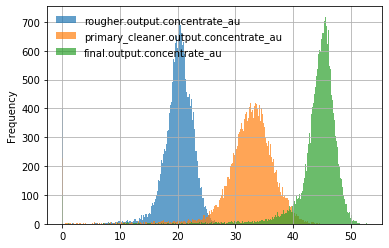

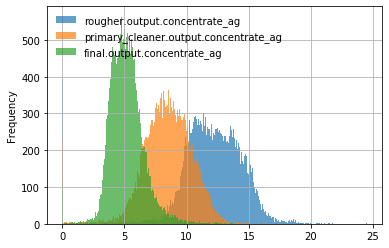

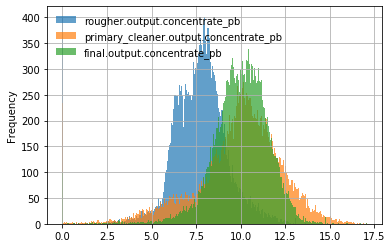

In [23]:
# Построим гистограммы концентраций
for col in columns:
    df_full.plot(kind='hist', y=col,
                 bins=300, alpha=0.7, label=col, grid=True, legend=True)
    plt.legend(loc='upper left', frameon=False)

Из первого графика видим, что средняя концентрация золота растет с каждым последующим этапом. Средняя концентрация серебра наоборот падает. А средняя концентрация свинца мало меняется.

## Анализ распределения размеров гранул сырья

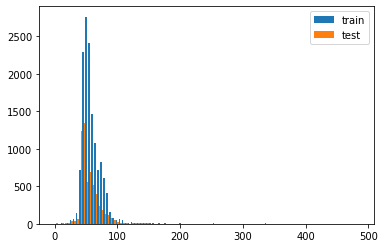

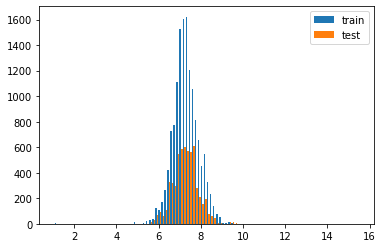

In [50]:
# Выберем колонки с размерами гранул сырья
columns_size = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']
# Построим гистограммы распределения размеров гранул для тренировочной и тестовой выборки
for col in columns_size:
    plt.hist([df_train[col], df_test[col]], bins=100, label=['train', 'test'])
    plt.legend(loc='upper right')
    plt.show()

По графикам видим, что распределения тренировочной и тестовой выборок очень схожи, отличается лишь количество повторений, что логично, ведь тренировочная выборка больше тестовой.

## Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [53]:
# Сделаем копию тренировочной выборки
df_train_conc_sum = df_train
# Добавим в новую таблицу колонки с сумарной концентрацией всех вещества на каждой стадии
df_train_conc_sum['rougher.input.feed_sum'] = (df_train_conc_sum['rougher.input.feed_ag']
                                               + df_train_conc_sum['rougher.input.feed_au']
                                               + df_train_conc_sum['rougher.input.feed_pb']
                                               + df_train_conc_sum['rougher.input.feed_sol'])

df_train_conc_sum['rougher.output.concentrate_sum'] = (df_train_conc_sum['rougher.output.concentrate_ag']
                                                       + df_train_conc_sum['rougher.output.concentrate_au']
                                                       + df_train_conc_sum['rougher.output.concentrate_pb']
                                                       + df_train_conc_sum['rougher.output.concentrate_sol'])

df_train_conc_sum['final.output.concentrate_sum'] = (df_train_conc_sum['final.output.concentrate_ag']
                                                     + df_train_conc_sum['final.output.concentrate_au']
                                                     + df_train_conc_sum['final.output.concentrate_pb']
                                                     + df_train_conc_sum['final.output.concentrate_sol'])

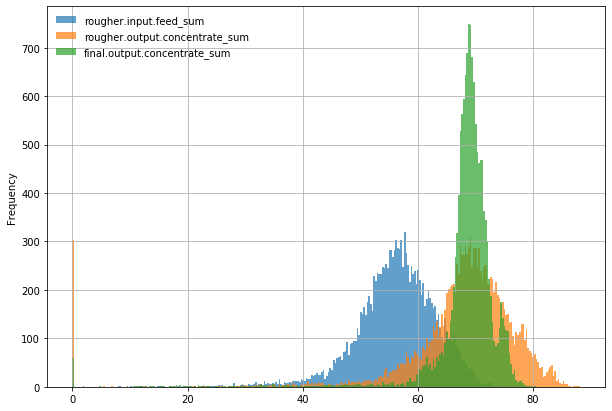

In [22]:
# Выберем колонки с суммарной концентрацией на различныx стадиях: в сырье, в черновом и финальном концентратах
columns = ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'final.output.concentrate_sum']
# Построим гистограммы концентраций
df_train_conc_sum.plot(kind='hist', y=columns,
                 bins=300, alpha=0.7, label=columns, figsize=(10, 7), grid=True, legend=True)
plt.legend(loc='upper left', frameon=False)
plt.show()

Видим, что концентрация в черновой стадии больше чем в сырье. При этом средняя концентрация в черновой стадии такая же как и в финальной, однако разброс значений концентрации в финальной стадии меньше, чем в черновой и на стадии сырья.

В третьем пункте мы смотрели распределения концентраций для золота, серебра и свинца, выбросов там не было, скорее всего в этом замешан материал 'sol', посмотрим ниже распределение концентраций этого метериала

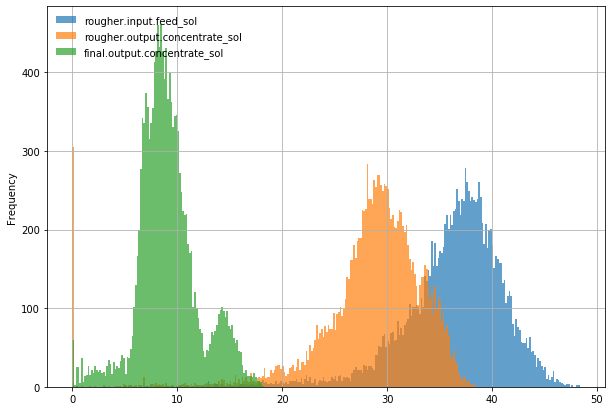

In [54]:
# Выберем колонки с суммарной концентрацией на различныx стадиях: в сырье, в черновом и финальном концентратах
columns = ['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'final.output.concentrate_sol']
# Построим гистограммы концентраций
df_train_conc_sum.plot(kind='hist', y=columns,
                 bins=300, alpha=0.7, label=columns, figsize=(10, 7), grid=True, legend=True)
plt.legend(loc='upper left', frameon=False)
plt.show()

Как и предполагалось, выбросы за счет этого материала

## Функция для вычисления итоговой sMAPE

In [23]:
# Выделим переменные и целевые признаки
features_train = df_train[df_test.columns]
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
features_test = df_full[df_full['date'].isin(df_test['date'])][df_test.columns]
target_test=df_full[df_full['date'].isin(df_test['date'])][['rougher.output.recovery', 'final.output.recovery']]

In [24]:
# Масштабируем все числовые признаки (оставим все колонки, кроме 'date')
numeric = df_test.drop('date', axis=1).columns

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
# Оставим в данных только числовые данные
features_train = features_train.drop('date', axis=1)
features_test = features_test.drop('date', axis=1)

In [26]:
#функция для вычисления итоговой sMAPE
def s_mape(target, predict):
    rougher, final = ((abs(target - predict) / ((abs(target) + abs(predict)) / 2)).mean() * 100)    
    result = (0.25 * rougher + 0.75 * final)
    return result
#делаем функцию sMAPE метрикой
smape = make_scorer(s_mape, greater_is_better=False)

## Оценка разных моделей

In [43]:
model = LinearRegression()
result_lin_reg = cross_val_score(model, features_train, target_train, scoring=smape, verbose=5, cv=10).mean()
print('sMAPE в модели линейной регрессии:', abs(result_lin_reg))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
[CV] .................................. , score=-10.748, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-10.305, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-11.647, total=   0.1s
[CV]  ................................................................
[CV] ................................... , score=-8.457, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-11.609, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV] .................................. , score=-13.358, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-12.056, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-11.564, total=   0.1s
[CV]  ................................................................
[CV] ................................... , score=-9.608, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-15.915, total=   0.1s
sMAPE в модели линейной регрессии: 11.526511765682075


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


In [44]:
# Найдем лучшую s_mape в модели дерева решений
model_lr = DecisionTreeRegressor(random_state=12345)
params_lr = {'max_depth' : range(1, 8),
            'min_samples_split': range(2,6),
            'min_samples_leaf': range(1, 5)}

search_tree = GridSearchCV(estimator=model_lr, param_grid=params_lr, scoring=smape, verbose=5, cv=10)
result_tree = search_tree.fit(features_train , target_train)
print('sMAPE в модели дерева решений:')
print('Лучшее значение:', abs(result_tree.best_score_))
print('Лучшая глубина дерева:', result_tree.best_params_)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-12.508, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-12.236, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-10.913, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-8.386, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-10.793, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-13.303, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-13.592, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-14.428, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-10.728, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-9.937, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=-12.508, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=-12.236, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, mi

[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, score=-10.728, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, score=-9.937, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=-12.508, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=-12.236, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=-10.913, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=-8.386, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, score=-12.508, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, score=-12.236, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, score=-10.913, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, score=-8.386, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, score=-10.793, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, score=-13.303, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=1, min_samples_leaf=3, mi

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, score=-8.340, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, score=-10.786, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, score=-13.450, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, score=-13.083, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, score=-12.305, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, score=-10.440, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=1, mi

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, score=-13.450, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, score=-13.083, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, score=-12.305, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, score=-10.440, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, score=-9.968, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, score=-12.401, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=2, mi

[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, score=-12.305, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, score=-10.440, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, score=-9.968, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, score=-12.401, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, score=-11.064, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, score=-9.948, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5 ............
[CV]  max_depth=2, min_samples_leaf=3, min

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=5, score=-9.968, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-11.492, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-10.959, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-9.912, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-7.713, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-10.423, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, score=-10.959, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, score=-9.912, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, score=-7.713, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, score=-10.423, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, score=-13.507, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, score=-14.460, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=2, min

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, score=-7.713, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, score=-10.423, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, score=-13.507, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, score=-13.842, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, score=-11.119, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, score=-9.302, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=3, min

[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, score=-13.507, total=   0.2s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, score=-13.842, total=   0.2s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, score=-11.119, total=   0.2s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, score=-9.302, total=   0.2s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, score=-9.665, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, score=-12.170, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=1, min

[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, score=-9.245, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, score=-8.496, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, score=-12.170, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, score=-10.941, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, score=-9.667, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, score=-7.633, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=4, min_samples_leaf=2, min_s

[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, score=-10.941, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, score=-9.667, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, score=-7.633, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, score=-11.017, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, score=-13.759, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, score=-13.424, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=4, min_samples_leaf=3, min

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=-11.017, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=-13.759, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=-13.321, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=-10.802, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=-9.245, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, score=-8.496, total=   0.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, score=-13.706, total=   0.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, score=-10.532, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, score=-9.074, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, score=-8.440, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, score=-11.839, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, score=-11.464, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=2, min

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, score=-9.074, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, score=-8.440, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, score=-11.542, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, score=-11.464, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, score=-9.892, total=   0.3s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, score=-7.886, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=5, min_samples_leaf=3, min_s

[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, score=-11.542, total=   0.3s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, score=-11.248, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, score=-9.892, total=   0.3s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, score=-7.886, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, score=-11.598, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, score=-13.586, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=5, min_samples_leaf=4, min

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, score=-10.265, total=   0.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, score=-8.286, total=   0.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, score=-11.996, total=   0.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, score=-13.315, total=   0.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, score=-14.179, total=   0.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, score=-10.443, total=   0.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=2, mi

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, score=-11.982, total=   0.3s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, score=-13.503, total=   0.3s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, score=-12.820, total=   0.3s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, score=-10.345, total=   0.3s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, score=-9.243, total=   0.3s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, score=-8.103, total=   0.3s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=3, min

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, score=-13.247, total=   0.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, score=-10.389, total=   0.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, score=-9.243, total=   0.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, score=-8.103, total=   0.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, score=-11.504, total=   0.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, score=-11.556, total=   0.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5 ............
[CV]  max_depth=6, min_samples_leaf=4, min

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, score=-9.803, total=   0.3s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, score=-16.131, total=   0.3s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, score=-11.195, total=   0.3s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, score=-11.185, total=   0.3s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, score=-10.381, total=   0.3s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, score=-8.213, total=   0.3s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=7, min_samples_leaf=2, min

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, score=-11.191, total=   0.3s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, score=-11.416, total=   0.3s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, score=-10.612, total=   0.3s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, score=-8.096, total=   0.3s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, score=-12.514, total=   0.3s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, score=-13.941, total=   0.3s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=3, mi

[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, score=-10.392, total=   0.3s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, score=-8.085, total=   0.3s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, score=-13.061, total=   0.3s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, score=-13.730, total=   0.3s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, score=-13.542, total=   0.3s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, score=-10.441, total=   0.3s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=4, mi

[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed:  3.7min finished


sMAPE в модели дерева решений:
Лучшее значение: 10.65569184293443
Лучшая глубина дерева: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [45]:
# Найдем лучшую s_mape в модели случайного леса
model_lr = RandomForestRegressor(random_state=12345)
params_lr = {'n_estimators' : range(1, 8),
             'max_depth' : range(1, 8),
             'min_samples_split': range(2,6),
             'min_samples_leaf': range(1, 5)}

search_forest = GridSearchCV(estimator=model_lr, param_grid=params_lr, scoring=smape, verbose=5, cv=10)
result_forest = search_forest.fit(features_train , target_train)
print('sMAPE в модели случайного леса:')
print('Лучшее значение:', abs(result_forest.best_score_))
print('Лучшие параметры леса:', result_forest.best_params_)

Fitting 10 folds for each of 784 candidates, totalling 7840 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.535, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-12.269, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.848, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-9.195, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.926, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-13.475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-13.591, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-12.684, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-11.114, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.871, total=   

[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.945, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-12.249, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.427, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-8.077, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.824, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-13.218, total=   0

[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-13.699, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-10.589, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-10.054, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-10.830, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-12.240, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-10.766, total=   

[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-13.475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-13.591, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-12.684, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-11.114, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-10.871, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=2 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=2, score=-11.236, total=   

[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-10.427, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-8.077, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-10.824, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-13.218, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-12.691, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-14.181, total=   0

[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-10.054, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-10.830, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-12.240, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-10.766, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-7.982, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-10.860, total=   0

[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-13.475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-13.591, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-12.684, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-11.114, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-10.871, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=2 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-11.236, total=   

[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-12.249, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-10.427, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-8.077, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-10.824, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-13.218, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-12.691, total=   0

[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-13.699, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.589, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.054, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-10.830, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-12.240, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-10.766, total=   

[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-13.475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-13.591, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-12.684, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-11.114, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-10.871, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=2 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-11.236, total=   

[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-12.249, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-10.427, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-8.077, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-10.824, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-13.218, total=   0.2s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-12.691, total=   0

[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-13.699, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.589, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.054, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-10.830, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-12.240, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-10.766, total=   

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-13.475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-13.591, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-12.684, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-11.114, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-10.871, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2, score=-11.236, total=   

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-12.249, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-10.427, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-8.077, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-10.824, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-13.218, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-12.691, total=   0

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-13.699, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-10.589, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-10.054, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-10.830, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-12.240, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-10.766, total=   

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-10.926, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-13.475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-13.591, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-12.684, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-11.114, total=   0.0s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-10.871, total=   

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-10.945, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-12.249, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-10.427, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-8.077, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-10.824, total=   0.2s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-13.218, total=   0

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-13.699, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-10.589, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-10.054, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-10.830, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-12.240, total=   0.1s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-10.766, total=   

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-13.475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-13.591, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-12.684, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-11.114, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-10.871, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=2 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=2, score=-11.236, total=   

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-12.249, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-10.427, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-8.077, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-10.824, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-13.218, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-12.691, total=   0

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-13.699, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-10.589, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=3 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-10.054, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-10.830, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-12.240, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-10.766, total=   

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-13.475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-13.591, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-12.684, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-11.114, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-10.871, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=2 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=2, score=-11.236, total=   

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-8.077, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-10.824, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-13.218, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-12.691, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-14.181, total=   0.2s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-10.497, total=   0

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-10.054, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-10.830, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-12.240, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-10.766, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-7.982, total=   0.1s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-10.860, total=   0

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-13.669, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-14.366, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-12.367, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.601, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.779, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=2 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=2, score=-10.554, total=   

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-11.065, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-9.656, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-8.467, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.869, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-13.604, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-12.870, total=   0.

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-12.299, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-10.362, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-10.133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-10.908, total=   0.3s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-11.051, total=   0.3s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-9.851, total=   0

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-13.669, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-14.366, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-12.367, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-10.601, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-10.779, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=2 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=2, score=-10.554, total=   

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-11.065, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-9.656, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-8.467, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-10.869, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-13.604, total=   0.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-12.870, total=   0.

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-10.133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-10.908, total=   0.3s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-11.051, total=   0.3s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-9.851, total=   0.3s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-8.561, total=   0.3s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-10.895, total=   0.

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-13.669, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-14.366, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-12.367, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-10.601, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-10.779, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=2 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-10.554, total=   

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-11.065, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-9.656, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-8.467, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-10.869, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-13.604, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-12.870, total=   0.

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-12.299, total=   0.2s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.362, total=   0.2s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-10.908, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-11.051, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-9.851, total=   0

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-13.669, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-14.366, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-12.367, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-10.601, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-10.779, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=2 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-10.554, total=   

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-11.065, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-9.656, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-8.467, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-10.869, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-13.604, total=   0.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-12.870, total=   0.

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-12.299, total=   0.2s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.362, total=   0.2s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-10.908, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-11.051, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-9.851, total=   0

[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-13.669, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-14.366, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-12.367, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-10.601, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-10.779, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=2 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=2, score=-10.554, total=   

[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-11.065, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-9.656, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-8.467, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-10.869, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-13.604, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-12.870, total=   0.

[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-12.299, total=   0.2s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-10.362, total=   0.2s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-10.133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-10.908, total=   0.3s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-11.051, total=   0.3s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-9.851, total=   0

[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-13.669, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-14.366, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-12.367, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-10.601, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-10.779, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=2 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=2, score=-10.554, total=   

[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-11.065, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-9.656, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-8.467, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-10.869, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-13.604, total=   0.4s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-12.870, total=   0.

[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-12.299, total=   0.2s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-10.362, total=   0.2s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-10.133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-10.908, total=   0.3s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-11.051, total=   0.3s
[CV] max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-9.851, total=   0

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-13.669, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-14.366, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-12.367, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-10.601, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-10.779, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=2 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=2, score=-10.554, total=   

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-11.065, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-9.656, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-8.467, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-10.869, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-13.604, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-12.870, total=   0.

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-12.299, total=   0.2s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-10.362, total=   0.2s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=3 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-10.133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-10.908, total=   0.3s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-11.051, total=   0.3s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-9.851, total=   0

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-13.669, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-14.366, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-12.367, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-10.601, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-10.779, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=2 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=2, score=-10.554, total=   

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-11.065, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-9.656, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-8.467, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-10.869, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-13.604, total=   0.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-12.870, total=   0.

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-10.133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-10.908, total=   0.3s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-11.051, total=   0.3s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-9.851, total=   0.3s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-8.561, total=   0.3s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-10.895, total=   0.

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-13.583, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-12.799, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-12.177, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=2 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=2, score=-10.100, total=   

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-11.091, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-9.417, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-7.741, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.043, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-13.297, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-12.806, total=   0.

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-12.141, total=   0.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-9.379, total=   0.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-9.801, total=   0.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-10.269, total=   0.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-11.138, total=   0.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-9.510, total=   0.4

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-13.583, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-12.799, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-12.177, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-10.679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-10.291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=2 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=2, score=-10.100, total=   

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-11.091, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-9.417, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-7.741, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-10.043, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-13.297, total=   0.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-12.806, total=   0.

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-12.141, total=   0.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-9.379, total=   0.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-9.801, total=   0.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-10.269, total=   0.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-11.138, total=   0.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-9.510, total=   0.4

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-13.583, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-12.799, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-12.177, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-10.679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-10.291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=2 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-10.100, total=   

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-11.091, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-9.417, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-7.741, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-10.043, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-13.297, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-12.797, total=   0.

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-12.141, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-9.379, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-9.801, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-10.269, total=   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-11.138, total=   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-9.510, total=   0.4

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-13.583, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-12.799, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-12.177, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-10.679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-10.291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=2 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-10.100, total=   

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-11.091, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-9.417, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-7.741, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-10.043, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-13.297, total=   0.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-12.797, total=   0.

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-12.141, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-9.379, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-9.801, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-10.269, total=   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-11.138, total=   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-9.510, total=   0.4

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-13.583, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-12.799, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-12.172, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-10.679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-10.291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=2 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=2, score=-10.100, total=   

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-11.091, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-9.417, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-7.741, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-10.043, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-13.297, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-12.800, total=   0.

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-12.140, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-9.379, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-9.801, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-10.269, total=   0.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-11.138, total=   0.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-9.510, total=   0.4

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-13.583, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-12.799, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-12.172, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-10.679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-10.291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=2 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=2, score=-10.100, total=   

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-11.091, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-9.417, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-7.741, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-10.043, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-13.297, total=   0.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-12.800, total=   0.

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-12.140, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-9.379, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-9.801, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-10.269, total=   0.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-11.138, total=   0.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-9.510, total=   0.4

[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-13.583, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-12.799, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-12.172, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-10.679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-10.291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=2 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=2, score=-10.100, total=   

[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-11.091, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-9.417, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-7.741, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-10.043, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-13.297, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-12.798, total=   0.

[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-12.140, total=   0.3s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-9.379, total=   0.3s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-9.801, total=   0.3s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-10.269, total=   0.4s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-11.138, total=   0.4s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-9.510, total=   0.4

[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-13.583, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-12.799, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-12.172, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-10.679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-10.291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=2 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=2, score=-10.100, total=   

[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-11.091, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-9.417, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-7.741, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-10.043, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-13.297, total=   0.6s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-12.798, total=   0.

[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-12.140, total=   0.3s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-9.379, total=   0.3s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=3 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-9.801, total=   0.3s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-10.269, total=   0.4s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-11.138, total=   0.4s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-9.510, total=   0.4

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-8.292, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.422, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-13.773, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-12.568, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-11.460, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-10.050, total=   0

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=5, score=-8.545, total=   0.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.354, total=   0.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.883, total=   0.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-9.309, total=   0.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-7.658, total=   0.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.619, total=   0.7

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-13.514, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-12.753, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-11.207, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-9.195, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-8.722, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-10.417, total=   0.

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-11.113, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-9.686, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-8.292, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-10.422, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-13.773, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-12.568, total=   0.

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=5, score=-10.855, total=   0.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=5, score=-8.659, total=   0.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=5, score=-8.545, total=   0.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-10.354, total=   0.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-10.883, total=   0.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-9.309, total=   0.7

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-7.975, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-10.890, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-13.514, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-12.754, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-11.207, total=   0.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-9.195, total=   0.

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=7, score=-8.798, total=   0.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-10.656, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-11.113, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-9.686, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-8.292, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-10.422, total=   0.1

[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-13.414, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-12.673, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-10.846, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-8.657, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-8.545, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-10.354, total=   0.

[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.771, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-9.418, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-7.975, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.890, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-13.479, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-12.769, total=   0.

[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=7, score=-10.761, total=   0.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=7, score=-8.811, total=   0.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=7, score=-8.798, total=   0.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-10.656, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-11.113, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-9.686, total=   0.1

[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-7.819, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-10.742, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-13.414, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-12.673, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-10.846, total=   0.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-8.657, total=   0.

[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=2, score=-8.909, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.564, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.771, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-9.418, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-7.975, total=   0.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.890, total=   0.4

[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-13.277, total=   0.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-12.573, total=   0.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-10.761, total=   0.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-8.811, total=   0.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-8.798, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=1 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-10.647, total=   0.

[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-10.848, total=   0.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-9.343, total=   0.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-7.819, total=   0.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-10.743, total=   0.7s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-13.414, total=   0.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-12.656, total=   0.

[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=-11.248, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=-9.530, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=-8.934, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-10.561, total=   0.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-10.769, total=   0.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-9.419, total=   0.4

[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-7.691, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-10.659, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-13.277, total=   0.8s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-12.519, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-10.728, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-8.805, total=   0.

[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=4, score=-8.763, total=   0.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-10.463, total=   0.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-10.848, total=   0.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-9.343, total=   0.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-7.819, total=   0.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-10.743, total=   0.6

[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-13.766, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-12.512, total=   0.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-11.248, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-9.530, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-8.934, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=3 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-10.561, total=   0.

[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-10.894, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-9.311, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-7.691, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-10.659, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-13.277, total=   0.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-12.519, total=   0.

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=4, score=-10.996, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=4 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=4, score=-8.923, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=4 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=4, score=-8.730, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=5, score=-10.465, total=   0.6s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=5, score=-10.848, total=   0.6s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=5, score=-9.343, total=   0.6

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-8.194, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-10.440, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-13.766, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-12.567, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-11.222, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-9.521, total=   0.

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=6, score=-8.670, total=   0.8s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-10.637, total=   0.9s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-10.894, total=   0.9s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-9.311, total=   0.9s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-7.689, total=   0.9s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-10.534, total=   0.9

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-13.373, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-12.962, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-10.996, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-8.923, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-8.730, total=   0.6s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=5, score=-10.465, total=   0.

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-10.937, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-9.435, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-8.194, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-10.440, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-13.766, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-12.567, total=   0.

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=6, score=-10.753, total=   0.7s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=6, score=-8.668, total=   0.7s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=6 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=6, score=-8.670, total=   0.7s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=7, score=-10.637, total=   0.9s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=7, score=-10.894, total=   0.9s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=7 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=7, score=-9.311, total=   0.9

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=-8.006, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=-11.197, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=-13.625, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=-12.316, total=   0.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=-10.897, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=-8.986, total=   0.

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=1, score=-8.754, total=   0.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2, score=-10.211, total=   0.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2, score=-10.841, total=   0.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2, score=-9.661, total=   0.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2, score=-8.407, total=   0.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=2, score=-10.420, total=   0.3

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=-13.641, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=-12.096, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=-10.648, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=-8.726, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=-8.155, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=7 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=7, score=-10.210, total=   1.

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4, score=-10.655, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4, score=-9.438, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4, score=-8.003, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4, score=-11.197, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4, score=-13.625, total=   0.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=4, score=-12.311, total=   0.

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1, score=-11.198, total=   0.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1, score=-9.810, total=   0.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1, score=-8.754, total=   0.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=2, score=-10.211, total=   0.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=2, score=-10.841, total=   0.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=2, score=-9.661, total=   0.3

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=-8.014, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=-10.660, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=-13.636, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=-12.082, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=-10.648, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=-8.727, total=   0.

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=3, score=-8.413, total=   0.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4, score=-10.194, total=   0.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4, score=-10.655, total=   0.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4, score=-9.436, total=   0.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4, score=-8.005, total=   0.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=4, score=-11.192, total=   0.6

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1, score=-13.766, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1, score=-12.787, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1, score=-11.197, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1, score=-9.758, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=1, score=-8.741, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=2 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=2, score=-10.235, total=   0.

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6, score=-10.596, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6, score=-9.343, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6, score=-8.011, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6, score=-10.595, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6, score=-13.604, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=6, score=-12.049, total=   0.

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=3, score=-10.933, total=   0.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=3, score=-9.163, total=   0.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=3, score=-8.413, total=   0.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=4, score=-10.194, total=   0.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=4, score=-10.655, total=   0.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=4, score=-9.436, total=   0.6

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1, score=-8.560, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1, score=-10.434, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1, score=-13.766, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1, score=-12.794, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1, score=-11.197, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1, score=-9.758, total=   0.

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=5, score=-8.148, total=   0.7s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6, score=-10.041, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6, score=-10.596, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6, score=-9.343, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6, score=-8.011, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=6, score=-10.595, total=   0.9

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3, score=-13.797, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3, score=-12.356, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3, score=-10.991, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3, score=-9.155, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=3, score=-8.428, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=4 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=4, score=-10.101, total=   0.

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1, score=-10.978, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1, score=-10.509, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1, score=-8.560, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1, score=-10.434, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1, score=-13.766, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=1, score=-12.540, total=   0

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=-10.632, total=   0.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=-8.650, total=   0.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=-8.147, total=   0.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=6, score=-9.969, total=   0.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=6, score=-10.624, total=   0.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=6, score=-9.360, total=   0.9s

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3, score=-8.159, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3, score=-11.140, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3, score=-13.797, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3, score=-12.356, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3, score=-10.991, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=3, score=-9.155, total=   0.

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=7, score=-8.289, total=   1.0s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1, score=-10.354, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1, score=-10.978, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1, score=-10.509, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1, score=-8.560, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1, score=-10.434, total=   0.

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=-13.627, total=   0.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=-12.182, total=   0.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=-10.632, total=   0.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=-8.650, total=   0.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=-8.147, total=   0.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=6 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=6, score=-9.969, total=   0.9

[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3, score=-10.489, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3, score=-9.667, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3, score=-8.159, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3, score=-11.140, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3, score=-13.656, total=   0.4s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=3, score=-12.377, total=   0.

[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=7, score=-10.464, total=   1.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=7 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=7, score=-8.690, total=   1.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=7 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=7, score=-8.223, total=   1.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=1, score=-10.354, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=1, score=-10.978, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=1, score=-10.512, total=   0.

[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5, score=-8.085, total=   0.7s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5, score=-10.829, total=   0.7s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5, score=-13.540, total=   0.7s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5, score=-12.154, total=   0.8s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5, score=-10.655, total=   0.7s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=5, score=-8.633, total=   0.

[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=2, score=-8.392, total=   0.3s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3, score=-10.224, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3, score=-10.489, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3, score=-9.667, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3, score=-8.159, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=3, score=-11.140, total=   0.5

[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7, score=-13.258, total=   1.0s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7, score=-11.996, total=   1.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7, score=-10.464, total=   1.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7, score=-8.690, total=   1.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=7, score=-8.223, total=   1.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=1 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=1, score=-10.354, total=   0.

[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5, score=-10.597, total=   0.7s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5, score=-9.378, total=   0.8s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5, score=-8.085, total=   0.7s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5, score=-10.829, total=   0.7s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5, score=-13.540, total=   0.7s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=5, score=-12.154, total=   0.

[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=2, score=-11.071, total=   0.4s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=2, score=-9.411, total=   0.4s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=2, score=-9.085, total=   0.4s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=3, score=-10.064, total=   0.5s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=3, score=-11.205, total=   0.5s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=3, score=-9.505, total=   0.5

[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7, score=-7.974, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7, score=-10.792, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7, score=-13.435, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7, score=-11.849, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7, score=-10.371, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=7, score=-8.909, total=   1.

[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=-8.518, total=   0.7s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5, score=-10.068, total=   0.9s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5, score=-11.310, total=   0.9s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5, score=-9.298, total=   0.9s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5, score=-8.096, total=   0.9s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=5, score=-11.035, total=   0.9

[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2, score=-14.544, total=   0.3s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2, score=-12.552, total=   0.4s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2, score=-11.058, total=   0.4s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2, score=-9.405, total=   0.4s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=2, score=-9.085, total=   0.4s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=3, score=-10.064, total=   0.

[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7, score=-11.172, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7, score=-9.238, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7, score=-7.980, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7, score=-10.793, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7, score=-13.470, total=   1.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=7, score=-11.923, total=   1.

[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-10.529, total=   0.7s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-9.118, total=   0.7s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=-8.781, total=   0.7s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=5, score=-10.068, total=   0.9s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=5, score=-11.293, total=   0.9s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=5, score=-9.297, total=   0.9

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-8.681, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-10.366, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-14.569, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-12.555, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-10.705, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=2, score=-9.347, total=   0.

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=6, score=-8.314, total=   1.1s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7, score=-10.217, total=   1.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7, score=-11.207, total=   1.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7, score=-9.283, total=   1.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7, score=-7.921, total=   1.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=7, score=-11.064, total=   1.2

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-13.693, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-12.218, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-10.431, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-9.061, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=4, score=-8.533, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=5, score=-10.177, total=   0.

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-11.376, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-10.003, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-8.681, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-10.366, total=   0.4s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-14.569, total=   0.3s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=2, score=-12.555, total=   0

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-10.277, total=   1.0s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-8.787, total=   1.1s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=6, score=-8.314, total=   1.1s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=7, score=-10.217, total=   1.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=7, score=-11.207, total=   1.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=7, score=-9.283, total=   1.2

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-8.146, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-10.898, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-13.688, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-12.213, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-10.538, total=   0.7s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=4, score=-9.032, total=   0.

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=1, score=-10.162, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2, score=-10.132, total=   0.4s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2, score=-11.340, total=   0.4s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2, score=-10.098, total=   0.4s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2, score=-8.596, total=   0.4s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=2, score=-10.375, total=   0

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-13.731, total=   1.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-11.798, total=   1.1s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-10.467, total=   1.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-8.722, total=   1.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=6, score=-8.320, total=   1.1s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=7 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=7, score=-10.493, total=   1.

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-11.173, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-9.514, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-8.090, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-11.072, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-13.589, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=4, score=-12.265, total=   0.

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-11.873, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-9.925, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1, score=-10.162, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=2, score=-10.132, total=   0.4s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=2, score=-11.340, total=   0.4s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=2, score=-10.098, total=   0

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-7.842, total=   1.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-10.926, total=   1.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-13.731, total=   1.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-11.798, total=   1.1s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-10.467, total=   1.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=6, score=-8.722, total=   1.

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=3, score=-8.567, total=   0.5s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-10.255, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-11.173, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-9.514, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-8.090, total=   0.7s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=4, score=-11.072, total=   0.7

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-14.027, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-13.574, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-10.888, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-9.924, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1, score=-10.008, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=2, score=-10.132, total=   0

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-10.816, total=   1.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-9.447, total=   1.1s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-7.893, total=   1.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-10.759, total=   1.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-13.477, total=   1.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=6, score=-11.818, total=   1.

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-10.728, total=   0.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-9.021, total=   0.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=3, score=-8.528, total=   0.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-10.163, total=   0.7s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-10.912, total=   0.7s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=4, score=-9.600, total=   0.7

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-9.339, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-9.933, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-14.027, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-13.574, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-10.888, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=-9.924, total=   0.2

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=5, score=-8.341, total=   0.9s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-10.021, total=   1.1s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-10.816, total=   1.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-9.447, total=   1.1s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-7.893, total=   1.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=6, score=-10.759, total=   1.1

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-13.735, total=   0.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-12.523, total=   0.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-10.728, total=   0.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-9.021, total=   0.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=3, score=-8.528, total=   0.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=4 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=4, score=-10.163, total=   0.

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-12.587, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-9.746, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-12.226, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-14.096, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-13.735, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=-11.579, total=   0

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=5, score=-8.745, total=   1.0s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=5, score=-8.190, total=   1.0s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.046, total=   1.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-10.914, total=   1.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-9.598, total=   1.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=-7.925, total=   1.2s

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-11.527, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-13.992, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-12.296, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-10.865, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-8.764, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=3, score=-8.748, total=   0.

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-10.618, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-13.112, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-12.587, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-9.796, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-12.123, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=1, score=-14.096, total=   0

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=5, score=-12.382, total=   1.0s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=5, score=-10.958, total=   1.0s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=5, score=-8.774, total=   1.0s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=5, score=-9.012, total=   1.0s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-10.065, total=   1.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=6, score=-10.986, total=   1.

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-9.970, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-8.420, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-11.909, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-13.699, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-12.355, total=   0.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=3, score=-10.797, total=   0.

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=7, score=-8.843, total=   1.4s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=7, score=-8.517, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-10.641, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-12.951, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-12.794, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1, score=-9.655, total=   0.2

[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-11.463, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-13.716, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-12.197, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-10.759, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-8.828, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=-8.263, total=   1.

[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.372, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.923, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-10.352, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-8.425, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-11.526, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=3, score=-13.822, total=   0

[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=7, score=-11.891, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=7, score=-10.498, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=7, score=-8.875, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=7, score=-8.461, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-10.641, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=1 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=1, score=-12.951, total=   0.

[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-9.765, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-8.067, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-11.463, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-13.716, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-12.197, total=   1.0s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=5, score=-10.759, total=   1.

[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=2, score=-9.243, total=   0.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=2, score=-9.058, total=   0.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.372, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-11.031, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-10.389, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=3, score=-8.380, total=   0.6

[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-11.500, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-13.318, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-11.939, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-10.556, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-8.899, total=   1.4s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=7, score=-8.455, total=   1.

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-10.366, total=   1.0s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-10.894, total=   1.0s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-9.744, total=   1.0s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-8.041, total=   1.0s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-11.303, total=   1.0s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=5, score=-13.718, total=   1.

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=-12.887, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=-10.643, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=-9.197, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=-9.490, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-10.413, total=   0.6s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=3 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=3, score=-10.856, total=   0.

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-9.517, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-7.876, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-12.067, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-13.360, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-11.905, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=7, score=-10.451, total=   1.

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=4, score=-9.032, total=   0.8s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=4, score=-8.605, total=   0.8s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-10.366, total=   1.0s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-10.894, total=   1.0s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-9.744, total=   1.0s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=5, score=-8.041, total=   1.0s

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-10.853, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-14.647, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-12.887, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-10.643, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-9.197, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=-9.490, total=   0.

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-10.367, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-10.676, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-9.517, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-7.876, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-12.067, total=   1.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=7, score=-13.360, total=   1.

[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=4, score=-12.588, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=4, score=-10.567, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=4, score=-8.948, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=4, score=-8.396, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=5, score=-10.221, total=   1.0s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=5 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=5, score=-10.656, total=   1.

[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-10.820, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-8.747, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-10.810, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-14.622, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-12.971, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=2, score=-10.534, total=   0

[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=6, score=-8.711, total=   1.2s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=6, score=-8.357, total=   1.2s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-10.157, total=   1.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-10.584, total=   1.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-9.704, total=   1.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=7, score=-7.951, total=   1.4s

[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-11.373, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-13.922, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-12.588, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-10.567, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-8.948, total=   0.8s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=4, score=-8.396, total=   0.

[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-10.273, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-11.280, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-10.820, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-8.747, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-10.810, total=   0.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=2, score=-14.622, total=   0

[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=6, score=-11.958, total=   1.2s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=6, score=-10.451, total=   1.2s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=6, score=-8.711, total=   1.2s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=6 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=6, score=-8.357, total=   1.2s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=7, score=-10.157, total=   1.4s
[CV] max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=7 
[CV]  max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=7, score=-10.584, total=   1.

[Parallel(n_jobs=1)]: Done 7840 out of 7840 | elapsed: 63.3min finished


sMAPE в модели случайного леса:
Лучшее значение: 10.143254100284892
Лучшие параметры леса: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 6}


Результаты оценки трех моделей:
- Линейная регрессия имеет sMAPE = 11,5;
- Дерево решений имеет sMAPE = 10,6;
- Случайный лес имеет sMAPE = 10,1.

Проверим лучшую модель на тестовой выборке!

In [57]:
# Проверим модель случайного леса на тестовой выборке
best_model = search_forest.best_estimator_
best_model.fit(features_train, target_train) # обучим модель на тренировочной выборке
predictions_test = best_model.predict(features_test) # получим предсказания модели на валидационной выборке
sMAPE = s_mape(target_test, predictions_test) # посчитаем долю правильных ответов
print("sMAPE в модели случайного леса с лучшими гиперпараметрами:", sMAPE)

sMAPE в модели случайного леса с лучшими гиперпараметрами: 9.048940667564473


## Выводы
- В ходе работы мы изучили и подготовили данные
- Проанализировали изменения концентраций металлов (Au, Ag, Pb) на различных этапах очистки
- Проанализировали распределения размеров гранул сырья, распределения схожи
- Проанализировали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
- Провели оценку различных моделей с помощью итогового симметричного среднего абсолютного процентного отклонения. Лучшей моделью оказалась модель случайного леса. А также проверили ее на тестовой выборке.